In [1]:
import json, requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
etf_list = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']
etf_list2 = ['AAPL','CSCO','IBM','AMZN']
pickle_list = []
for etf in etf_list:
    pickle_name = etf + '.pickle'
    pickle_list.append(pickle_name)
pickle_list

['VTI.pickle',
 'VEA.pickle',
 'VWO.pickle',
 'VNQ.pickle',
 'XLE.pickle',
 'BND.pickle',
 'SCHP.pickle',
 'VTEB.pickle',
 'VIG.pickle']

In [3]:
df_list = []
for etf in pickle_list:
    df_name = 'df_' + etf[0:2]
    df_name = pd.read_pickle(etf)
    df_list.append(df_name)
print(df_list)

[      close       datetime      high       low    open   volume
0    124.93  1496725200000  125.2900  124.7800  124.96  2985175
1    125.07  1496811600000  125.2400  124.6800  125.12  1253346
2    125.29  1496898000000  125.5300  124.8800  125.12  1827022
3    125.19  1496984400000  126.0200  124.4500  125.48  2585550
4    125.17  1497243600000  125.2000  124.6300  125.06  1973626
5    125.79  1497330000000  125.8400  125.3200  125.52  1567671
6    125.61  1497416400000  126.0200  125.1000  126.00  2584291
7    125.33  1497502800000  125.3450  124.6250  124.77  2483525
8    125.25  1497589200000  125.5300  124.7400  125.42  2018198
9    126.27  1497848400000  126.3500  125.6700  125.67  1816545
10   125.41  1497934800000  126.1700  125.4000  126.16  1359474
11   124.69  1498021200000  125.2000  124.5100  125.11  3364563
12   124.74  1498107600000  125.0800  124.5900  124.78  1639327
13   125.05  1498194000000  125.1900  124.5848  124.81  1829284
14   125.14  1498453200000  125.6900  1

In [4]:
for df in df_list:
    df['Normed Return'] = df['close'] / df.iloc[0]['close']
    df['Allocation'] = df['Normed Return'] * (1/4)
    df['Pos'] = df['Allocation'] * 100000

In [5]:
pos_ls = []
for df in df_list:
    pos_ls.append(df['Pos'])
pos_ls

[0      25000.000000
 1      25028.015689
 2      25072.040343
 3      25052.029136
 4      25048.026895
 5      25172.096374
 6      25136.076203
 7      25080.044825
 8      25064.035860
 9      25268.150164
 10     25096.053790
 11     24951.973105
 12     24961.978708
 13     25024.013448
 14     25042.023533
 15     24835.908109
 16     25070.039222
 17     24869.927159
 18     24903.946210
 19     24963.979829
 20     24991.995517
 21     24745.857680
 22     24917.954054
 23     24935.964140
 24     24929.960778
 25     25108.060514
 26     25148.082926
 27     25260.145682
 28     25260.145682
 29     25276.154647
            ...     
 474    29886.736572
 475    30048.827343
 476    30092.851997
 477    30094.853118
 478    29870.727607
 479    29820.699592
 480    30142.880013
 481    30046.826223
 482    29528.535980
 483    29480.509085
 484    29386.456416
 485    29522.532618
 486    28776.114624
 487    29036.260306
 488    29208.356680
 489    29472.504603
 490    29264

In [6]:
portfolio_val = pd.concat(pos_ls, axis=1)

In [7]:
portfolio_val.columns = ['vti pos', 'vea pos', 'vwo pos', 'vnq pos', 'xle pos', 'bnd pos', 'schp pos', 'vteb pos', 'vig pos']
# portfolio_val.columns = ['aapl pos', 'csco pos', 'ibm pos', 'amzn pos']

In [8]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [9]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [10]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [11]:
ASR = (252**0.5) * SR
ASR

0.27280046021561855

In [12]:
close_ls = []
for df in df_list:
    close_ls.append(df['close'])
stocks = pd.concat(close_ls,axis=1)
stocks.columns = ['VTI','VEA', 'VWO', 'VNQ', 'XLE', 'BND', 'SCHP', 'VTEB', 'VIG']

In [13]:
stocks.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,124.93,41.94,41.20,82.71,65.98,82.10,55.72,51.63,93.39
1,125.07,41.91,41.17,83.29,65.05,81.99,55.53,51.59,93.52
2,125.29,41.85,41.25,83.09,64.86,81.93,55.52,51.53,93.57
3,125.19,41.70,40.97,83.67,66.42,81.86,55.43,51.47,93.75
4,125.17,41.57,40.82,84.42,66.89,81.84,55.36,51.43,93.82


In [14]:
mean_daily_return = stocks.pct_change(1).mean()
mean_daily_return

VTI     0.000341
VEA    -0.000031
VWO     0.000028
VNQ     0.000178
XLE    -0.000083
BND     0.000002
SCHP    0.000009
VTEB    0.000048
VIG     0.000407
dtype: float64

In [15]:
stocks.pct_change(1).corr()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
VTI,1.000000,0.846268,0.733550,0.504939,0.695658,-0.228488,-0.205716,-0.211033,0.949317
VEA,0.846268,1.000000,0.829175,0.387538,0.673845,-0.201675,-0.162256,-0.218785,0.798190
VWO,0.733550,0.829175,1.000000,0.337339,0.540985,-0.117585,-0.092313,-0.141221,0.678512
VNQ,0.504939,0.387538,0.337339,1.000000,0.253555,0.165349,0.131203,0.142251,0.534028
XLE,0.695658,0.673845,0.540985,0.253555,1.000000,-0.215633,-0.098765,-0.208709,0.634595
BND,-0.228488,-0.201675,-0.117585,0.165349,-0.215633,1.000000,0.828045,0.715790,-0.194156
SCHP,-0.205716,-0.162256,-0.092313,0.131203,-0.098765,0.828045,1.000000,0.621746,-0.182597
VTEB,-0.211033,-0.218785,-0.141221,0.142251,-0.208709,0.715790,0.621746,1.000000,-0.175309
VIG,0.949317,0.798190,0.678512,0.534028,0.634595,-0.194156,-0.182597,-0.175309,1.000000


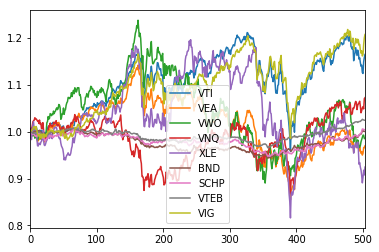

In [16]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [17]:
stock_daily_return = stocks.pct_change(1)
stock_daily_return.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001121,-0.000715,-0.000728,0.007012,-0.014095,-0.001340,-0.003410,-0.000775,0.001392
2,0.001759,-0.001432,0.001943,-0.002401,-0.002921,-0.000732,-0.000180,-0.001163,0.000535
3,-0.000798,-0.003584,-0.006788,0.006980,0.024052,-0.000854,-0.001621,-0.001164,0.001924
4,-0.000160,-0.003118,-0.003661,0.008964,0.007076,-0.000244,-0.001263,-0.000777,0.000747


In [18]:
log_ret = np.log(stocks/stocks.shift(1))
pickle_path = os.path.join(os.path.join(os.path.dirname(os.getcwd()), 'data', 'log_ret.pickle'))
log_ret.to_pickle(pickle_path)
log_ret.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001120,-0.000716,-0.000728,0.006988,-0.014195,-0.001341,-0.003416,-0.000775,0.001391
2,0.001757,-0.001433,0.001941,-0.002404,-0.002925,-0.000732,-0.000180,-0.001164,0.000535
3,-0.000798,-0.003591,-0.006811,0.006956,0.023767,-0.000855,-0.001622,-0.001165,0.001922
4,-0.000160,-0.003122,-0.003668,0.008924,0.007051,-0.000244,-0.001264,-0.000777,0.000746


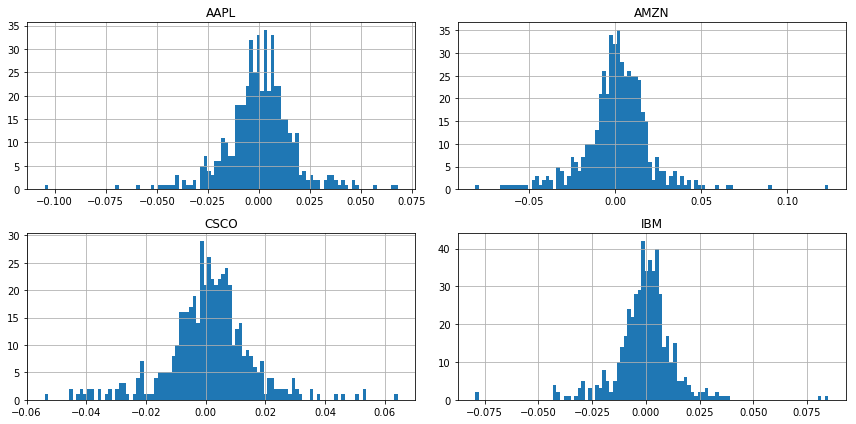

In [34]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [35]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,503.0,0.000361,0.016938,-0.104924,-0.007574,0.000676,0.008843,0.068053
CSCO,503.0,0.001108,0.014448,-0.053959,-0.005585,0.001582,0.007911,0.064431
IBM,503.0,-0.000282,0.014008,-0.079348,-0.006085,0.000494,0.005942,0.084934
AMZN,503.0,0.001112,0.019686,-0.081424,-0.006643,0.001525,0.011115,0.124131


In [36]:
log_ret.mean() * 252

AAPL    0.091018
CSCO    0.279184
IBM    -0.071063
AMZN    0.280110
dtype: float64

In [37]:
log_ret.cov() * 252

,AAPL,CSCO,IBM,AMZN
AAPL,0.072295,0.036496,0.022826,0.052131
CSCO,0.036496,0.052603,0.026778,0.041990
IBM,0.022826,0.026778,0.049448,0.026141
AMZN,0.052131,0.041990,0.026141,0.097660


In [40]:
num_ports = 20000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):
    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights
    
    ret_arr[ind] = np.sum((log_ret.mean()*weights)*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

[0.20638296 0.21056091 0.24995234 0.21802374 0.2086112  0.23738593
 0.2254708  0.21013591 0.20507745 0.22300587 0.19810799 0.21814179
 0.19699848 0.2164829  0.22847945 0.21311677 0.24022649 0.20514776
 0.20505287 0.19841358 0.22577063 0.20474964 0.20215203 0.22591663
 0.23687608 0.20682896 0.20089853 0.22692382 0.19927771 0.20657938
 0.20212471 0.21958423 0.20728767 0.2195086  0.20737426 0.2086573
 0.23960055 0.21167323 0.2021483  0.22606214 0.20573944 0.21171245
 0.21703786 0.22487449 0.22275156 0.20661455 0.20778658 0.21812994
 0.20162821 0.1970768  0.19953832 0.21368636 0.21635866 0.21727936
 0.22441091 0.19804168 0.20898157 0.21099225 0.19835564 0.19475693
 0.22279366 0.23132298 0.21873073 0.21758388 0.22779813 0.20389791
 0.2386633  0.19959815 0.22307915 0.232241   0.20870065 0.19696844
 0.26089    0.2003166  0.21030904 0.21567577 0.2098867  0.22681103
 0.21403408 0.23437402 0.19841337 0.22249333 0.20467751 0.20849663
 0.2181253  0.19808416 0.20098686 0.21226965 0.21773986 0.23257

In [41]:
m = sharpe_arr.argmax()
all_weights[m,:]
sharpe_arr.max()

1.1032742845775831

In [42]:
max_sr_ret = ret_arr[m]
max_sr_vol = vol_arr[m]

Text(0, 0.5, 'Return')

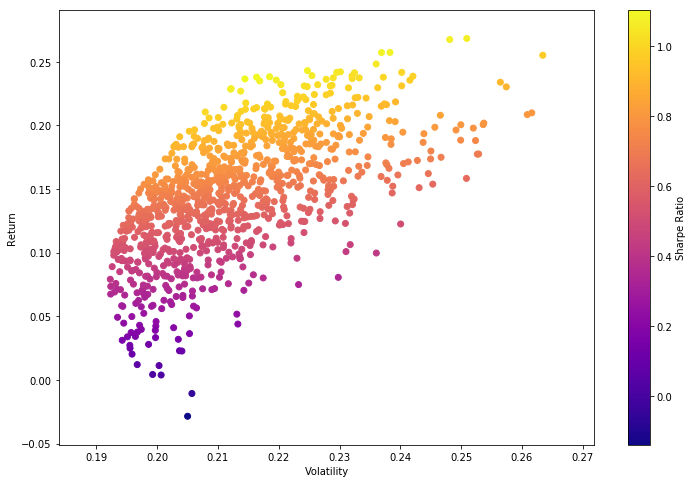

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
